In [1]:
import pipeline
import filepaths as fp

import torch
from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters
from rnn_model_predict import predict_all

info: uses cached preprocessed file ../output/train.preprocessed.fr
info: uses cached preprocessed file ../output/train.preprocessed.en
25m 28s (- 611m 31s) (4000 4%) 4.4689
50m 57s (- 585m 58s) (8000 8%) 4.0498
76m 42s (- 562m 28s) (12000 12%) 3.8518
102m 25s (- 537m 43s) (16000 16%) 3.7251
128m 22s (- 513m 30s) (20000 20%) 3.6701
154m 17s (- 488m 34s) (24000 24%) 3.5998
180m 25s (- 463m 57s) (28000 28%) 3.5470
206m 31s (- 438m 51s) (32000 32%) 3.4811
232m 34s (- 413m 27s) (36000 36%) 3.4598
258m 39s (- 387m 59s) (40000 40%) 3.4100
284m 48s (- 362m 29s) (44000 44%) 3.4017
310m 46s (- 336m 40s) (48000 48%) 3.3553
336m 51s (- 310m 56s) (52000 52%) 3.4008
362m 54s (- 285m 8s) (56000 56%) 3.4158
389m 9s (- 259m 26s) (60000 60%) 3.4946
415m 8s (- 233m 30s) (64000 64%) 3.5378
441m 24s (- 207m 43s) (68000 68%) 3.6325
466m 14s (- 181m 18s) (72000 72%) 5.1406
490m 54s (- 155m 1s) (76000 76%) 5.2344
515m 51s (- 128m 57s) (80000 80%) 5.1664
exceeded max hours 9


<Figure size 432x288 with 0 Axes>

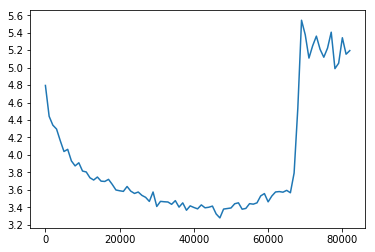

Losses diagram saved in TODO
Models saved in TODO



KeyError: 'brunissante'

In [2]:
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 100000
max_hours = 9

def train_model(index_array_pairs, s_vocab_size, t_vocab_size, max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderRNN(s_vocab_size, hidden_size).to(device)
    attn_decoder = AttnDecoderRNN(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
    plot_every = n_iters/100.
    plot_losses = trainIters(
        index_array_pairs, encoder, attn_decoder, n_iters, max_length, 
        print_every=n_iters/25., plot_every = plot_every, 
        learning_rate = learning_rate, max_hours = max_hours)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every

# MAX_LENGTH = 10
# (encoder, attn_decoder, slang, tlang) = pipeline.run(
#     fp.spath_toy, fp.tpath_toy, train_model, 
#     fp.spath_toy, fp.tpath_toy, predict_all, 
#     max_length = MAX_LENGTH, useCache = True)

MAX_LENGTH = 50
(encoder, attn_decoder, slang, tlang) = pipeline.run(
    fp.spath_train, fp.tpath_train, train_model, 
    fp.spath_test, fp.tpath_test, predict_all, 
    max_length = MAX_LENGTH, useCache = True)
